In [ ]:
#install yolov5
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu122



Looking in indexes: https://download.pytorch.org/whl/cu122


In [ ]:
!python -c "import torch; print(torch.cuda.is_available())"


True


In [ ]:
#구글드라이브 접근
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
cd /content/yolov5/data/

/content/yolov5/data


In [ ]:
#드라이브에서 데이터셋, 설정 파일 복
!cp /content/gdrive/MyDrive/yolov5/archive.zip .
!cp /content/gdrive/MyDrive/yolov5/custom.yaml .

In [ ]:
ls

archive.zip       coco.yaml             ImageNet1000.yaml  images/          VisDrone.yaml
Argoverse.yaml    custom.yaml           ImageNet100.yaml   Objects365.yaml  VOC.yaml
coco128-seg.yaml  GlobalWheat2020.yaml  ImageNet10.yaml    scripts/         xView.yaml
coco128.yaml      hyps/                 ImageNet.yaml      SKU-110K.yaml


In [ ]:
!mkdir archive

In [ ]:
!unzip /content/yolov5/data/archive.zip -d /content/yolov5/data/archive/

Archive:  /content/yolov5/data/archive.zip
   creating: /content/yolov5/data/archive/test/
   creating: /content/yolov5/data/archive/train/
 extracting: /content/yolov5/data/archive/train/mush.cache  
   creating: /content/yolov5/data/archive/train/mush/
 extracting: /content/yolov5/data/archive/train/mush/ce (1).jpg  
 extracting: /content/yolov5/data/archive/train/mush/ce (1).txt  
 extracting: /content/yolov5/data/archive/train/mush/ce (10).jpg  
 extracting: /content/yolov5/data/archive/train/mush/ce (10).txt  
 extracting: /content/yolov5/data/archive/train/mush/ce (100).jpg  
 extracting: /content/yolov5/data/archive/train/mush/ce (100).txt  
 extracting: /content/yolov5/data/archive/train/mush/ce (101).jpg  
 extracting: /content/yolov5/data/archive/train/mush/ce (101).txt  
 extracting: /content/yolov5/data/archive/train/mush/ce (102).jpg  
 extracting: /content/yolov5/data/archive/train/mush/ce (102).txt  
 extracting: /content/yolov5/data/archive/train/mush/ce (103).jpg  
 ex

In [ ]:
cd /content/yolov5/

/content/yolov5


In [ ]:
# yolov5s 학습
!python train.py --data "data/custom.yaml" --weights "models/yolov5s.yaml" --epoch 100 --device 0

2024-05-26 20:07:03.235128: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-26 20:07:03.235178: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-26 20:07:03.360191: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data/custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=Fal

In [ ]:
# yolov5x 학습
!python train.py --data "data/custom.yaml" --cfg "models/yolov5x.yaml"  --weights yolov5x.pt --epoch 100 --device 0

2024-06-02 17:35:08.559528: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 17:35:08.559587: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 17:35:08.560988: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5x.pt, cfg=models/yolov5x.yaml, data=data/custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=Fa

In [ ]:
# 재학습
!python train.py --data "data/custom.yaml" --epoch 100 --device 0 --weight "/content/gdrive/MyDrive/runs/train/oldexp/weights/best.pt" --cfg "models/yolov5x.yaml" --hyp "data/hyps/hyp.scratch-high.yaml"

2024-06-06 10:32:37.656753: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 10:32:37.656827: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 10:32:37.658812: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/gdrive/MyDrive/runs/train/oldexp/weights/best.pt, cfg=models/yolov5x.yaml, data=data/custom.yaml, hyp=data/hyps/hyp.scratch-high.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=Non

In [ ]:
# 테스트
!python detect.py --weight /content/gdrive/MyDrive/runs/train/oldexp/weights/best.pt --source /content/gdrive/MyDrive/yolov5/test

detect: weights=['/content/gdrive/MyDrive/runs/train/oldexp/weights/best.pt'], source=/content/gdrive/MyDrive/yolov5/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5x summary: 322 layers, 86180143 parameters, 0 gradients, 203.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/8 /content/gdrive/MyDrive/yolov5/test/ptest1.jpg: 448x640 2 poison_mushrooms, 71.2ms
image 2/8 /content/gdrive/MyDrive/yolov5/test/ptest2.jpg: 480x640 1 poison_mushroom, 72.1ms
image 3/8 /content/gdrive/MyDrive/yolov5/test/ptest3.jp

In [ ]:
# 결과 드라이브 저장
!cp -r /content/yolov5/runs /content/gdrive/MyDrive

In [ ]:
cd /content/yolov5/runs/detect/exp

/content/yolov5/runs/detect/exp


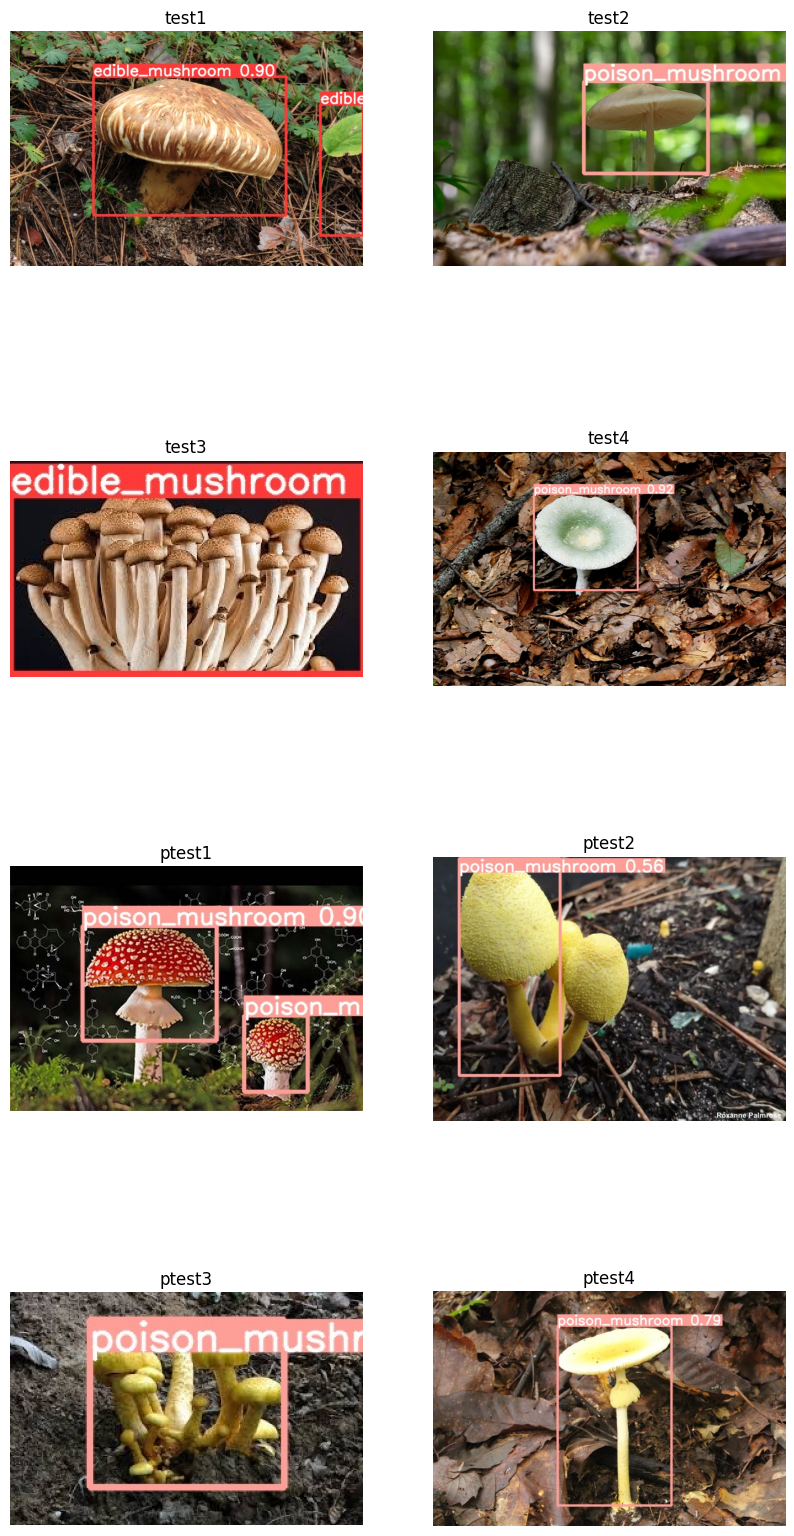

In [ ]:
# 테스트 출력
import matplotlib.pyplot as plt
import cv2
import numpy as np

image_paths = ['test1.jpg', 'test2.jpg', 'test3.jpg', 'test4.jpg',
               'ptest1.jpg', 'ptest2.jpg', 'ptest3.jpg', 'ptest4.jpg']

n_rows = 4
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 20))

for i, image_path in enumerate(image_paths):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    row = i // n_cols
    col = i % n_cols
    axes[row, col].imshow(img_rgb)
    axes[row, col].axis('off')
    title = image_path.split('.')[0]
    axes[row, col].set_title(title, fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
